<a href="https://colab.research.google.com/github/wilosaurus/PCVK_2241720171/blob/main/Meet6_PCVK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PRACTICUM**

**[1]**

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**[2]**

In [5]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
import math
import os
import glob


**[3]**

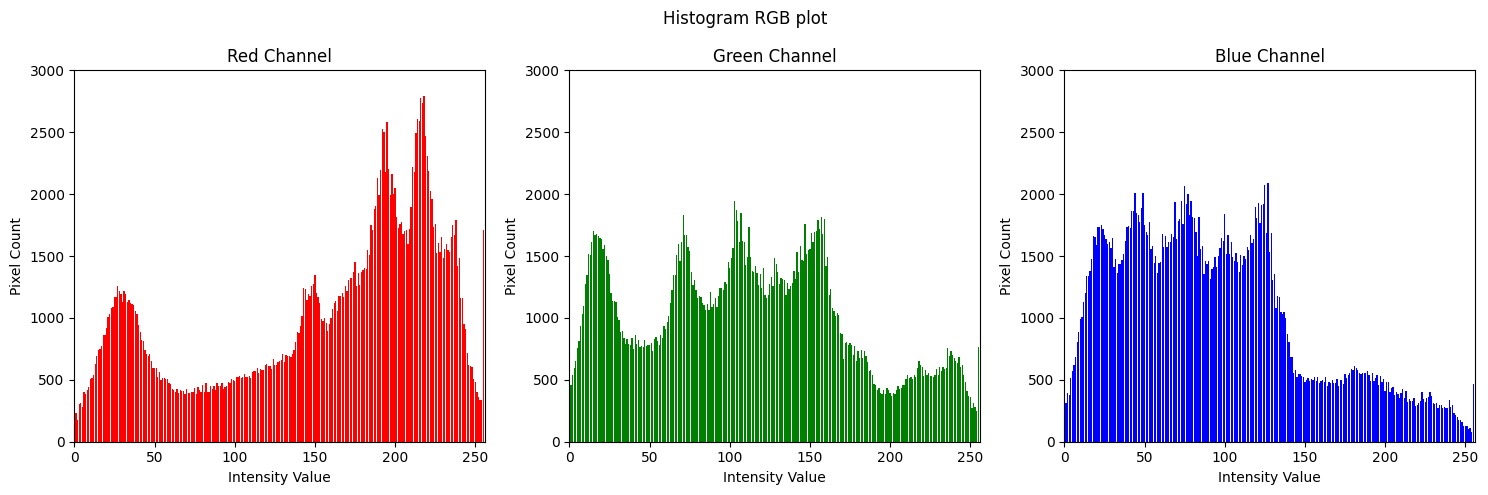

In [6]:
# Load the color image
image_path = '/content/drive/MyDrive/image/lena.jpg'  # Update with the path to your image
color_image = cv.imread(image_path)  # Make sure this path is correct

# Create a figure with subplots for R, G, and B channels
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Set common titles
fig.suptitle('Histogram RGB plot')

# Change the order of channels to Red, Green, Blue
colors = ('r', 'g', 'b')
channel_titles = ['Red Channel', 'Green Channel', 'Blue Channel']

# Loop through the color channels and plot histograms as bars
for i, (color, title) in enumerate(zip(colors, channel_titles)):
    hist = cv.calcHist([color_image], [2 - i], None, [256], [0, 256])

    axs[i].bar(np.arange(256), hist[:, 0], color=color)
    axs[i].set_xlim([0, 256])
    axs[i].set_ylim([0, 3000])
    axs[i].set_title(title)
    axs[i].set_xlabel('Intensity Value')
    axs[i].set_ylabel('Pixel Count')

# Show the plot
plt.tight_layout()
plt.show()


**[4]**

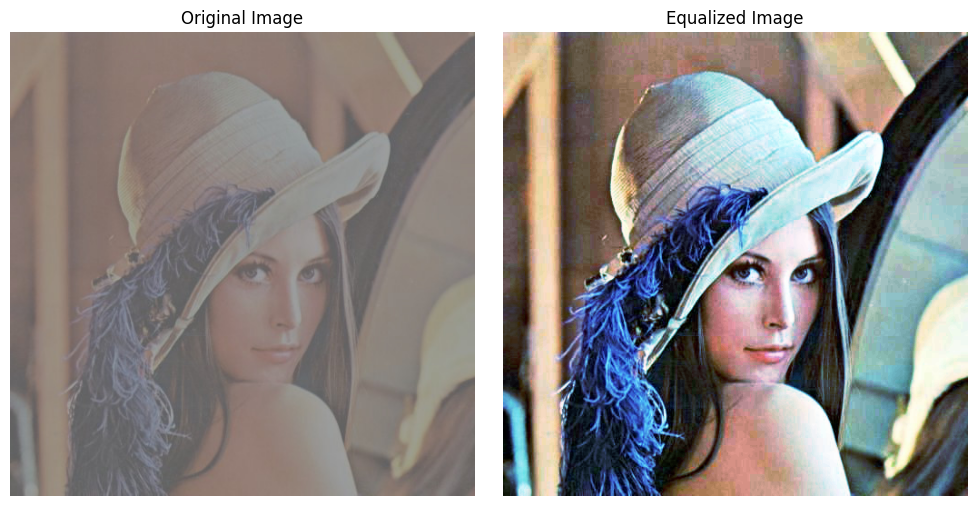

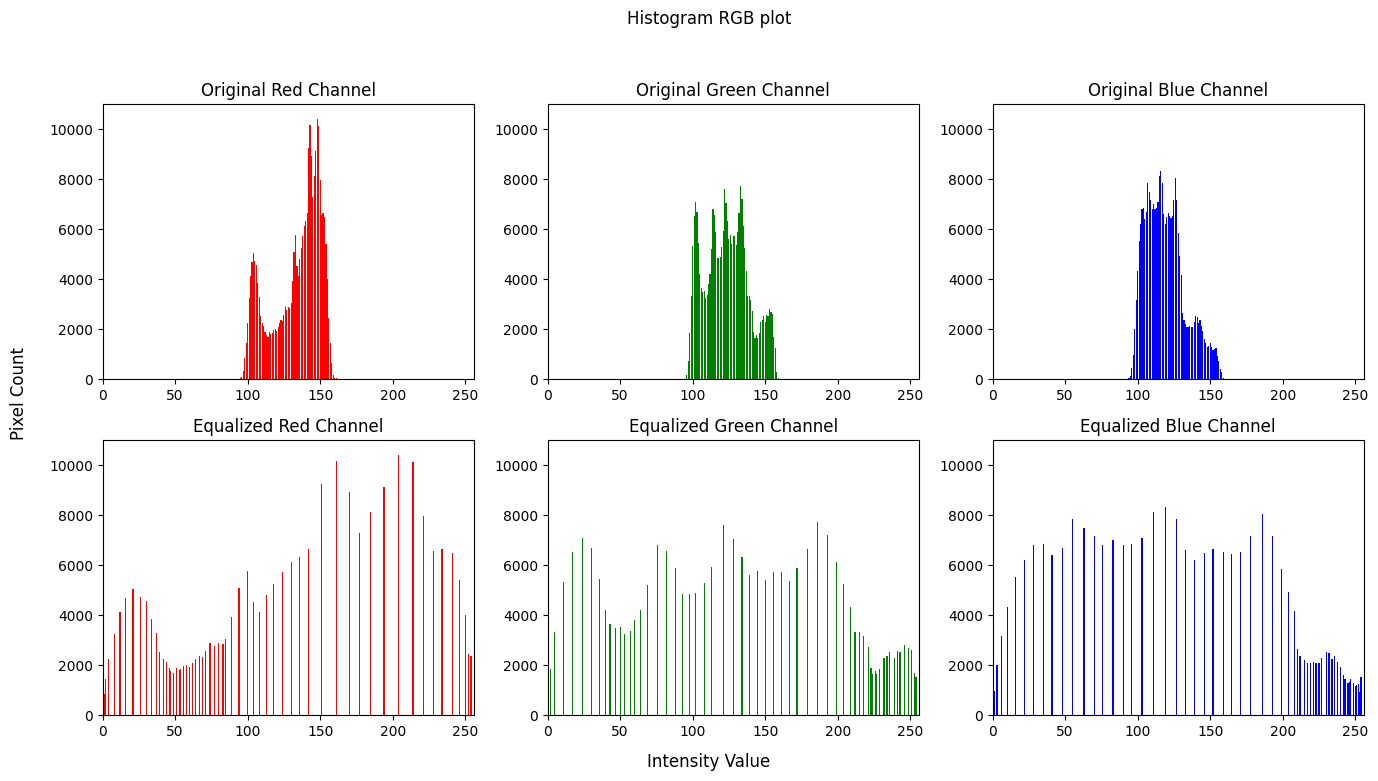

In [7]:
# Load the color image
image_path = '/content/drive/MyDrive/image/lena_lc.jpg'  # Update with the path to your image
color_image = cv.imread(image_path)  # Read the image in color

# Split the channels
b_channel, g_channel, r_channel = cv.split(color_image)

# Function to perform histogram equalization on a single channel
def histogram_equalization(channel):
    # Step 1: Calculate histogram
    hist = cv.calcHist([channel], [0], None, [256], [0, 256])

    # Step 2: Calculate cumulative distribution function (CDF)
    cdf = hist.cumsum()

    # Step 3: Normalize the CDF
    cdf_normalized = cdf * 255 / cdf[-1]  # Scale to 0-255

    # Step 4: Map pixel values using the normalized CDF
    equalized_channel = np.interp(channel.flatten(), np.arange(256), cdf_normalized).reshape(channel.shape)

    return equalized_channel.astype(np.uint8)

# Perform histogram equalization on each channel
equalized_r = histogram_equalization(r_channel)
equalized_g = histogram_equalization(g_channel)
equalized_b = histogram_equalization(b_channel)

# Merge the equalized channels back
equalized_image = cv.merge((equalized_b, equalized_g, equalized_r))

# Display the original and equalized images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv.cvtColor(color_image, cv.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv.cvtColor(equalized_image, cv.COLOR_BGR2RGB))
plt.title('Equalized Image')
plt.axis('off')

# Show original and equalized images
plt.tight_layout()
plt.show()

# Calculate the histogram of the original and equalized images using OpenCV
colors = ('r', 'g', 'b')
channel_titles = ['Red Channel', 'Green Channel', 'Blue Channel']
fig, axs = plt.subplots(2, 3, figsize=(15, 8))

# Set common title for histograms
fig.suptitle('Histogram RGB plot')

# Loop through the channels for the original image
for i, color in enumerate(colors):
    hist = cv.calcHist([color_image], [2 - i], None, [256], [0, 256])

    axs[0, i].bar(np.arange(256), hist[:, 0], color=color)
    axs[0, i].set_xlim([0, 256])
    axs[0, i].set_ylim([0, 11000])  # Adjust the y-axis limit as needed
    axs[0, i].set_title(f'Original {channel_titles[i]}')

# Loop through the channels for the equalized image
for i, color in enumerate(colors):
    hist = cv.calcHist([equalized_image], [2 - i], None, [256], [0, 256])

    axs[1, i].bar(np.arange(256), hist[:, 0], color=color)
    axs[1, i].set_xlim([0, 256])
    axs[1, i].set_ylim([0, 11000])  # Adjust the y-axis limit as needed
    axs[1, i].set_title(f'Equalized {channel_titles[i]}')

# Set common labels for the entire figure
fig.text(0.5, 0.04, 'Intensity Value', ha='center', va='center', fontsize=12)
fig.text(0.04, 0.5, 'Pixel Count', ha='center', va='center', rotation='vertical', fontsize=12)

# Show histograms
plt.tight_layout(rect=[0.05, 0.05, 0.95, 0.95])  # Adjust layout to make room for labels
plt.show()


**[5]**

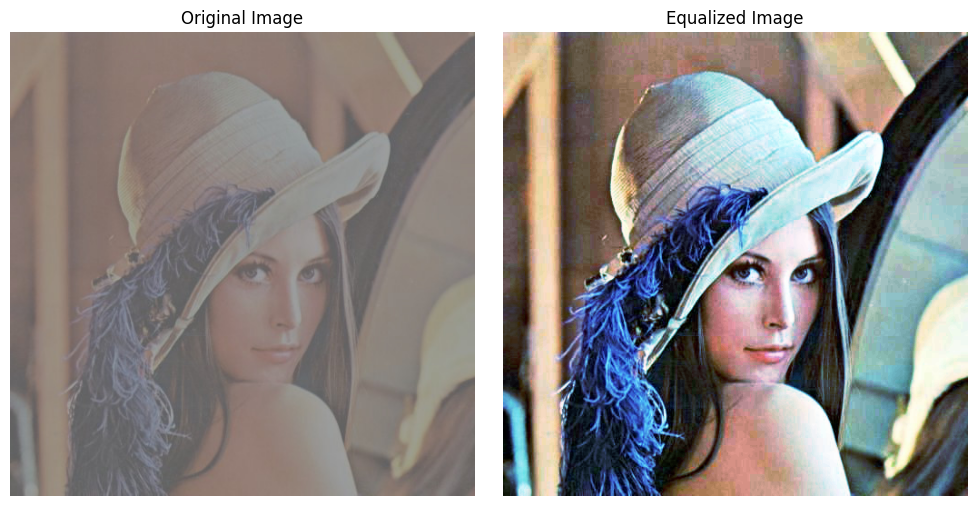

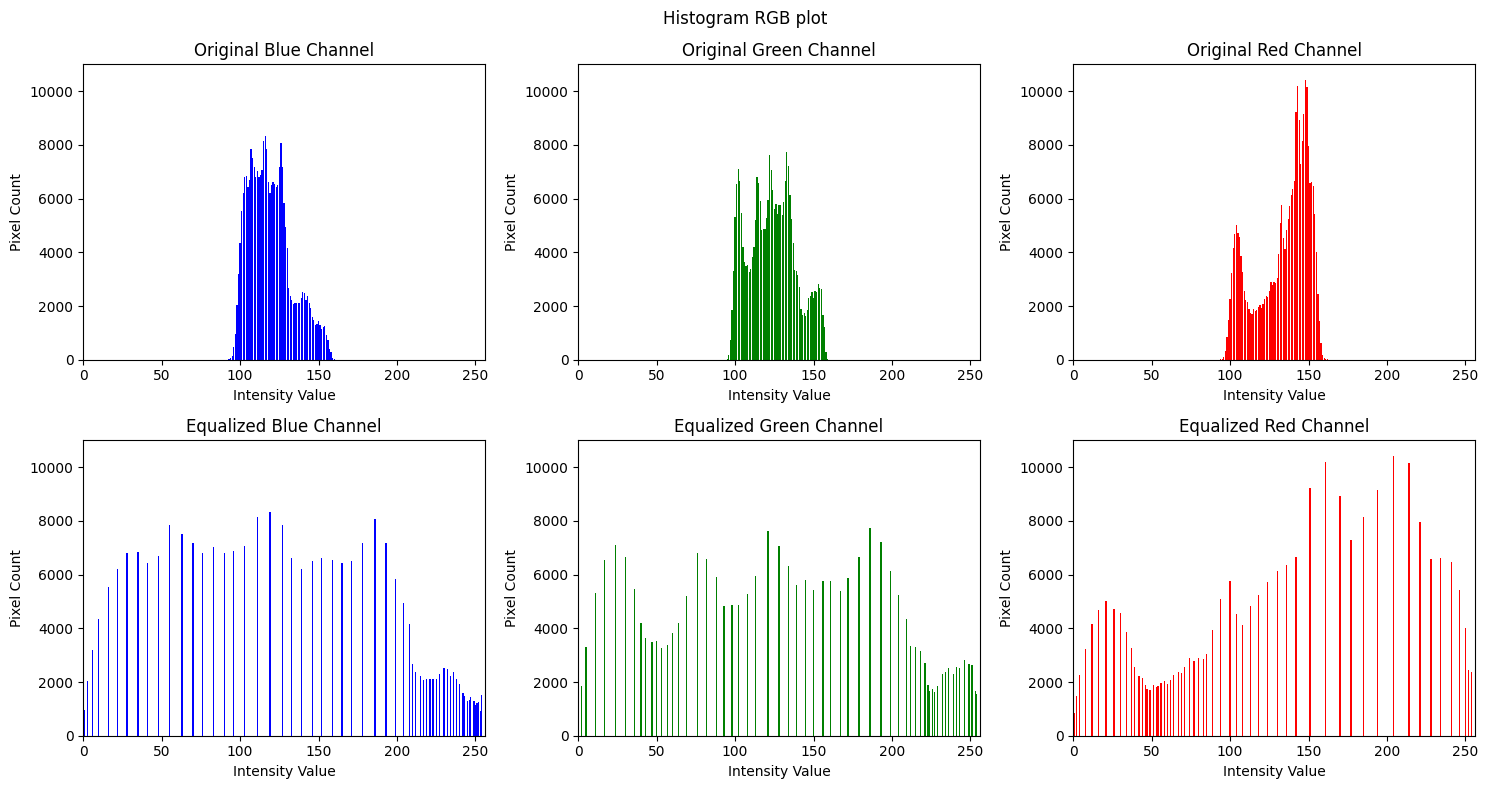

In [8]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

# Load the color image
image_path = '/content/drive/MyDrive/image/lena_lc.jpg'  # Update with the path to your image
color_image = cv.imread(image_path)  # Read the image in color

# Display the original image
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv.cvtColor(color_image, cv.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

# Split the channels
b_channel, g_channel, r_channel = cv.split(color_image)

# Function to perform histogram equalization on a single channel
def histogram_equalization(channel):
    # Calculate histogram
    hist, bins = np.histogram(channel.flatten(), 256, [0, 256])

    # Calculate cumulative distribution function (CDF)
    cdf = hist.cumsum()

    # Normalize CDF to range [0, 255]
    cdf_normalized = (cdf - cdf.min()) * 255 / (cdf.max() - cdf.min())

    # Use CDF to transform the channel
    equalized_channel = np.interp(channel.flatten(), bins[:-1], cdf_normalized).reshape(channel.shape)
    return equalized_channel.astype(np.uint8)

# Perform histogram equalization on each channel manually
equalized_r = histogram_equalization(r_channel)
equalized_g = histogram_equalization(g_channel)
equalized_b = histogram_equalization(b_channel)

# Merge the equalized channels back
equalized_image = cv.merge((equalized_b, equalized_g, equalized_r))

# Display the equalized image
plt.subplot(1, 2, 2)
plt.imshow(cv.cvtColor(equalized_image, cv.COLOR_BGR2RGB))  # Convert BGR to RGB for display
plt.title('Equalized Image')
plt.axis('off')

# Show original and equalized images
plt.tight_layout()
plt.show()

# Calculate and plot the histogram of the original and equalized images
colors = ('b', 'g', 'r')
channel_titles = ['Blue Channel', 'Green Channel', 'Red Channel']
fig, axs = plt.subplots(2, 3, figsize=(15, 8))

# Set common title for histograms
fig.suptitle('Histogram RGB plot')

# Loop through the channels for the original image
for i, color in enumerate(colors):
    hist = cv.calcHist([color_image], [i], None, [256], [0, 256])

    axs[0, i].bar(np.arange(256), hist[:, 0], color=color)
    axs[0, i].set_xlim([0, 256])
    axs[0, i].set_ylim([0, 11000])  # Adjust the y-axis limit as needed
    axs[0, i].set_title(f'Original {channel_titles[i]}')
    axs[0, i].set_xlabel('Intensity Value')
    axs[0, i].set_ylabel('Pixel Count')

# Loop through the channels for the equalized image
for i, color in enumerate(colors):
    hist = cv.calcHist([equalized_image], [i], None, [256], [0, 256])

    axs[1, i].bar(np.arange(256), hist[:, 0], color=color)
    axs[1, i].set_xlim([0, 256])
    axs[1, i].set_ylim([0, 11000])  # Adjust the y-axis limit as needed
    axs[1, i].set_title(f'Equalized {channel_titles[i]}')
    axs[1, i].set_xlabel('Intensity Value')
    axs[1, i].set_ylabel('Pixel Count')

# Show histograms
plt.tight_layout()
plt.show()


**[6]**

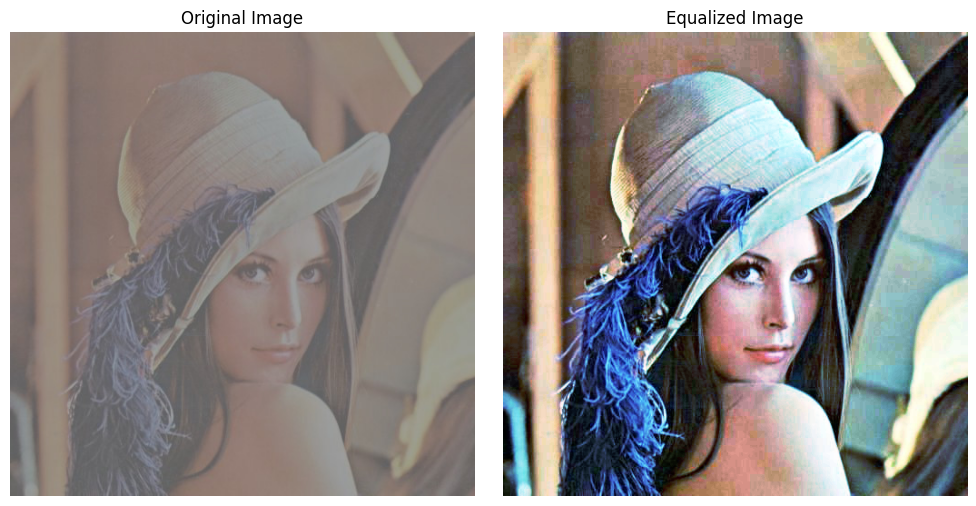

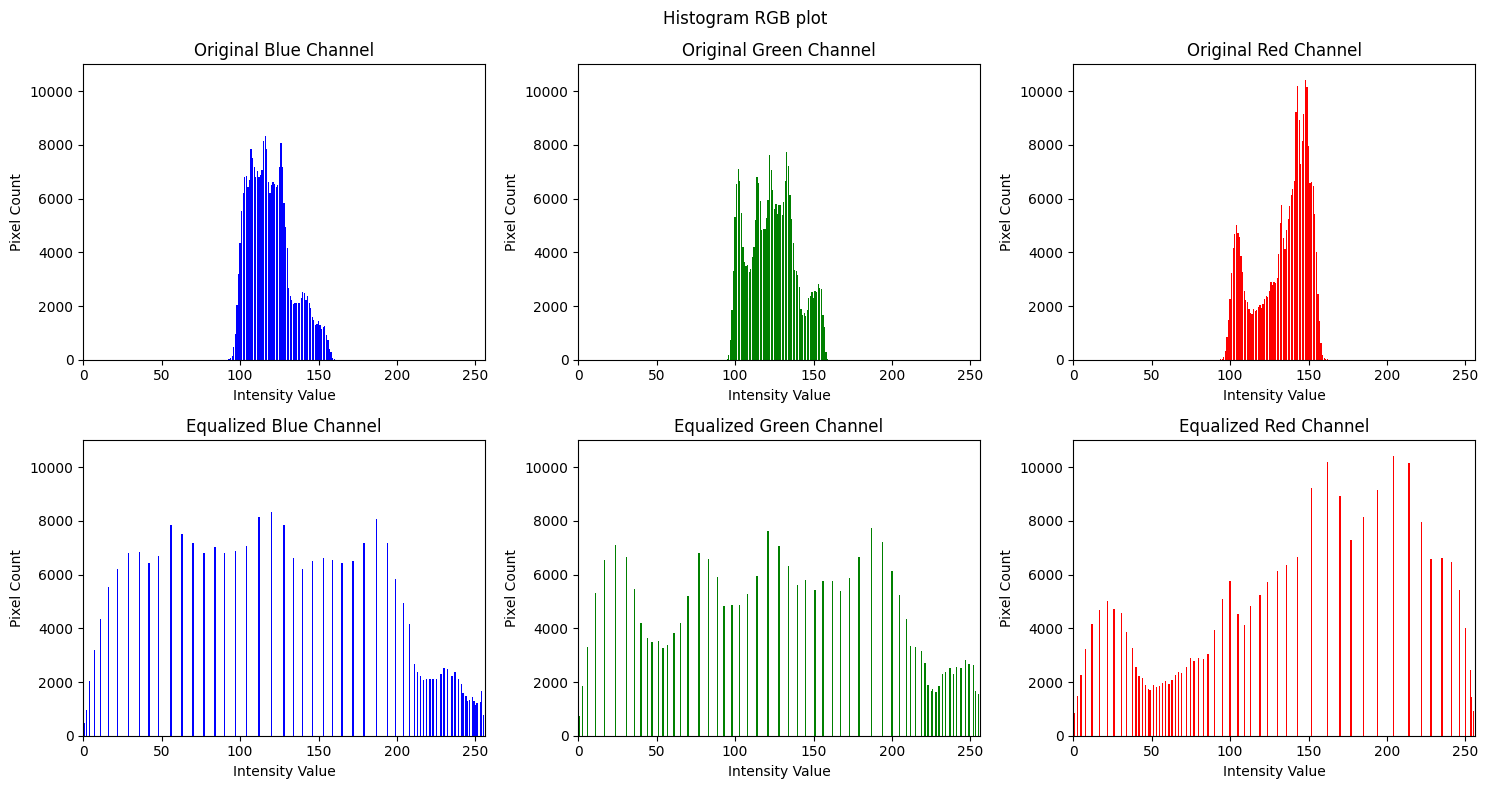

In [9]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

# Load the color image
image_path = '/content/drive/MyDrive/image/lena_lc.jpg'  # Update with the path to your image
color_image = cv.imread(image_path)  # Read the image in color

# Display the original image
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv.cvtColor(color_image, cv.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

# Split the channels
b_channel, g_channel, r_channel = cv.split(color_image)

# Perform histogram equalization on each channel
equalized_r = cv.equalizeHist(r_channel)
equalized_g = cv.equalizeHist(g_channel)
equalized_b = cv.equalizeHist(b_channel)

# Merge the equalized channels back
equalized_image = cv.merge((equalized_b, equalized_g, equalized_r))

# Display the equalized image
plt.subplot(1, 2, 2)
plt.imshow(cv.cvtColor(equalized_image, cv.COLOR_BGR2RGB))  # Convert BGR to RGB for display
plt.title('Equalized Image')
plt.axis('off')

# Show original and equalized images
plt.tight_layout()
plt.show()

# Calculate the histogram of the original and equalized images using OpenCV
colors = ('b', 'g', 'r')  # Order channels as per OpenCV
channel_titles = ['Blue Channel', 'Green Channel', 'Red Channel']
fig, axs = plt.subplots(2, 3, figsize=(15, 8))

# Set common title for histograms
fig.suptitle('Histogram RGB plot')

# Loop through the channels for the original image
for i, color in enumerate(colors):
    hist = cv.calcHist([color_image], [i], None, [256], [0, 256])

    axs[0, i].bar(np.arange(256), hist[:, 0], color=color)
    axs[0, i].set_xlim([0, 256])
    axs[0, i].set_ylim([0, 11000])  # Adjust the y-axis limit as needed
    axs[0, i].set_title(f'Original {channel_titles[i]}')
    axs[0, i].set_xlabel('Intensity Value')
    axs[0, i].set_ylabel('Pixel Count')

# Loop through the channels for the equalized image
for i, color in enumerate(colors):
    hist = cv.calcHist([equalized_image], [i], None, [256], [0, 256])

    axs[1, i].bar(np.arange(256), hist[:, 0], color=color)
    axs[1, i].set_xlim([0, 256])
    axs[1, i].set_ylim([0, 11000])  # Adjust the y-axis limit as needed
    axs[1, i].set_title(f'Equalized {channel_titles[i]}')
    axs[1, i].set_xlabel('Intensity Value')
    axs[1, i].set_ylabel('Pixel Count')

# Show histograms
plt.tight_layout()
plt.show()


**[7]**

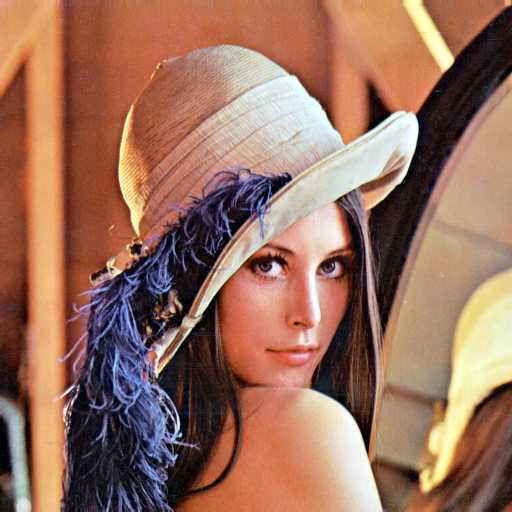

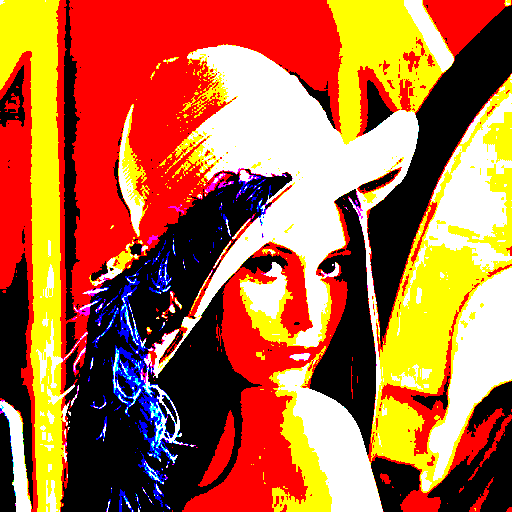

In [10]:
import cv2 as cv
import numpy as np
from google.colab.patches import cv_imshow

# Function to map the image to 8 colors
def map_to_8_colors(image):
    # Create an empty array for the output
    output = np.zeros_like(image)

    # Define thresholds for each color range
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            b, g, r = image[i, j]

            # Black: low values for R, G, B
            if r < 128 and g < 128 and b < 128:
                output[i, j] = [0, 0, 0]  # Black
            # Red: high R, low G, B
            elif r >= 128 and g < 128 and b < 128:
                output[i, j] = [0, 0, 255]  # Red
            # Green: high G, low R, B
            elif r < 128 and g >= 128 and b < 128:
                output[i, j] = [0, 255, 0]  # Green
            # Yellow: high R and G, low B
            elif r >= 128 and g >= 128 and b < 128:
                output[i, j] = [0, 255, 255]  # Yellow
            # Blue: high B, low R, G
            elif r < 128 and g < 128 and b >= 128:
                output[i, j] = [255, 0, 0]  # Blue
            # Cyan: high G and B, low R
            elif r < 128 and g >= 128 and b >= 128:
                output[i, j] = [255, 255, 0]  # Cyan
            # Magenta: high R and B, low G
            elif r >= 128 and g < 128 and b >= 128:
                output[i, j] = [255, 0, 255]  # Magenta
            # White: high values for R, G, B
            else:
                output[i, j] = [255, 255, 255]  # White

    return output

# Load the image
image = cv.imread('/content/drive/MyDrive/image/lena.jpg')

# Perform color mapping
output_image = map_to_8_colors(image)

# Show the original and output images
cv_imshow(image)
cv_imshow(output_image)


**[8]**

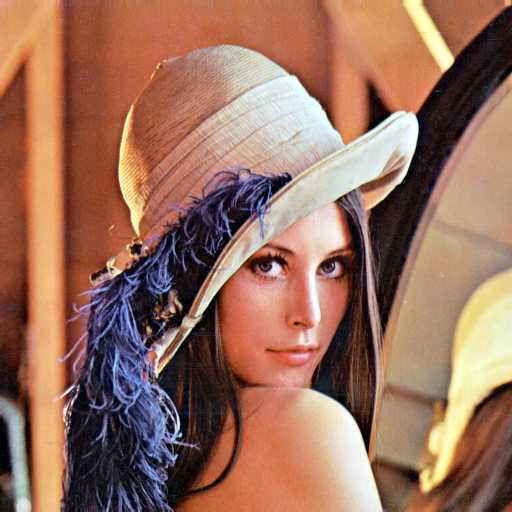

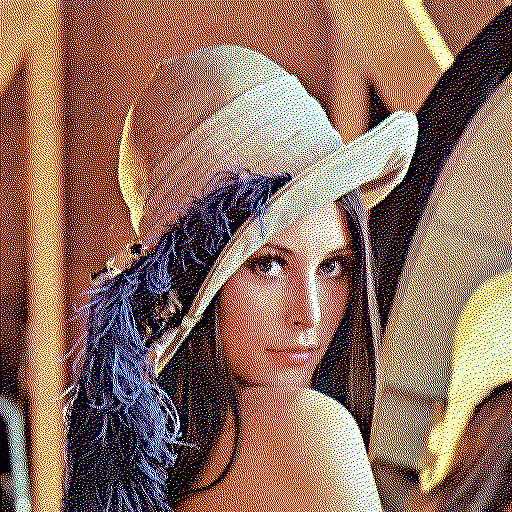

In [11]:
import cv2 as cv
import numpy as np
from google.colab.patches import cv_imshow

# Floyd-Steinberg dithering for RGB image using the basic formula
def floyd_steinberg_dithering_rgb(image):
    # Get the height and width of the image
    height, width, _ = image.shape

    # Loop through each pixel
    for y in range(height):
        for x in range(width):
            # For each channel (Red, Green, Blue), calculate the old pixel value and quantize it
            for c in range(3):  # Channel: 0 -> Red, 1 -> Green, 2 -> Blue
                old_pixel = image[y, x, c]
                new_pixel = 255 if old_pixel > 127 else 0  # Quantize to either black (0) or white (255)
                image[y, x, c] = new_pixel
                quant_error = old_pixel - new_pixel  # Calculate the error

                # Distribute the error to the neighboring pixels based on Floyd-Steinberg formula
                if x + 1 < width:  # Right
                    image[y, x + 1, c] = np.clip(image[y, x + 1, c] + quant_error * 7 / 16, 0, 255)
                if x - 1 >= 0 and y + 1 < height:  # Bottom-left
                    image[y + 1, x - 1, c] = np.clip(image[y + 1, x - 1, c] + quant_error * 3 / 16, 0, 255)
                if y + 1 < height:  # Bottom
                    image[y + 1, x, c] = np.clip(image[y + 1, x, c] + quant_error * 5 / 16, 0, 255)
                if x + 1 < width and y + 1 < height:  # Bottom-right
                    image[y + 1, x + 1, c] = np.clip(image[y + 1, x + 1, c] + quant_error * 1 / 16, 0, 255)

    # Return the dithered RGB image
    return image

# Load the image
image = cv.imread('/content/drive/MyDrive/image/lena.jpg')

# Apply Floyd-Steinberg dithering to the RGB image
dithered_image = floyd_steinberg_dithering_rgb(image.copy())

# Show the original and dithered images
cv_imshow(image)  # Original image
cv_imshow(dithered_image)  # Dithered image


**[9]**

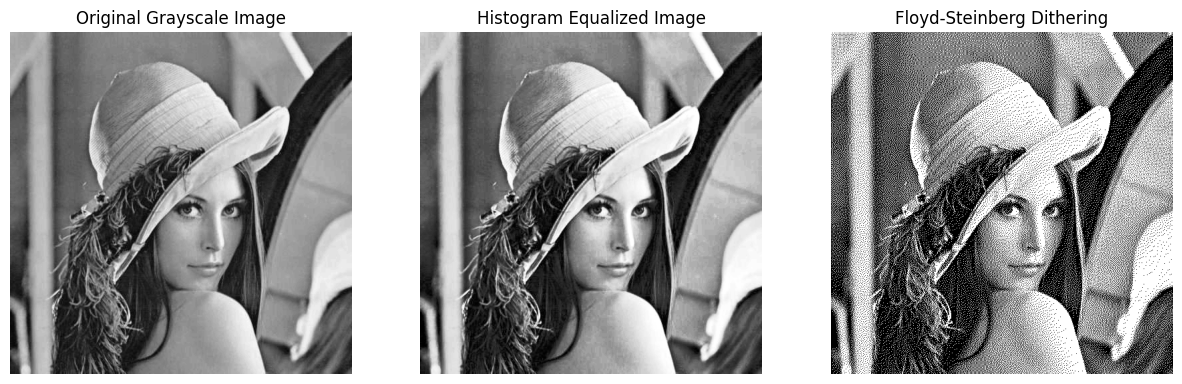

In [12]:
# Load the grayscale image
image_path = '/content/drive/MyDrive/image/lena_lc.jpg'
lena_lc = cv.imread(image_path, cv.IMREAD_GRAYSCALE)

# Apply histogram equalization
equalized_image = cv.equalizeHist(lena_lc)

# Define Floyd-Steinberg dithering function
def floyd_steinberg_dithering(image):
    h, w = image.shape
    image = image.astype(float)

    # Iterate over each pixel
    for i in range(h):
        for j in range(w):
            old_pixel = image[i, j]
            new_pixel = 255 * round(old_pixel / 255)  # Quantize pixel value
            image[i, j] = new_pixel
            error = old_pixel - new_pixel  # Calculate error

            # Diffuse the error to neighboring pixels (Floyd-Steinberg matrix)
            if j + 1 < w:
                image[i, j + 1] += error * 7 / 16
            if i + 1 < h and j > 0:
                image[i + 1, j - 1] += error * 3 / 16
            if i + 1 < h:
                image[i + 1, j] += error * 5 / 16
            if i + 1 < h and j + 1 < w:
                image[i + 1, j + 1] += error * 1 / 16

    # Clip values to valid range [0, 255]
    return np.clip(image, 0, 255).astype(np.uint8)

# Apply Floyd-Steinberg dithering to the equalized image
dithered_image = floyd_steinberg_dithering(equalized_image)

# Display original, equalized, and dithered images
plt.figure(figsize=(15, 8))

# Original greyscale image
plt.subplot(1, 3, 1)
plt.imshow(lena_lc, cmap='gray')
plt.title('Original Grayscale Image')
plt.axis('off')

# Equalized image
plt.subplot(1, 3, 2)
plt.imshow(equalized_image, cmap='gray')
plt.title('Histogram Equalized Image')
plt.axis('off')

# Dithered image
plt.subplot(1, 3, 3)
plt.imshow(dithered_image, cmap='gray')
plt.title('Floyd-Steinberg Dithering')
plt.axis('off')

plt.show()